#  Medical Imaging 
##  Practical session 3
### Image Processing: Image Enhancement and Filtering
### 14th November 2023
***
**Sebastian Amador Sanchez (sebastian.amador.sanchez@vub.be), Jef Vandemeulebroucke\
Department of Electronics and Informatics (ETRO)\
Vrije Universitet Brussel, Pleinlaan 2, B-1050 Brussels, Belgium**

<font color=blue>Insert students names and IDs here</font>

César Zapata
02213600

## Instructions
The jupyter notebook should be submitted as the report by teams of two using the assignment functionality of Ufora.

Please complete this notebook and upload the following before the deadline **November 27, 2023, at 23:59**:
- the notebook in *.ipynb* format
- the executed notebook in *.html* format (File --> Download As --> HTML)

The report should contain concise answers to the questions (in specified cells), python code and plotted figures. For this practical session, **we do not** require a separate written report in *.pdf* format.

## Introduction
This exercise session aims to gain insight into the image enhancement and filtering operations commonly applied in medical image processing. You are expected to obtain enhanced and noise-free images at the end of this session.

For more information on the following concepts, see the lecture recordings, course slides, and the related study material.


### BraTS dataset
You will be working with images from the [*Brain Tumor Segmentation (BRATS) Challenge*](http://www.braintumorsegmentation.org), which contains scans of multiple glioma cases. Gliomas are a type of brain tumor originating in the glial cells surrounding the neurons. They are characterized by having various heterogeneous histological subregions. Therefore, they have varying intensity profiles, and multimodal MRI scans must be employed to visualize them properly.

<img src="./images/brats.png" alt="drawing" width="800"/>

**(A)** Whole tumor visible in T2-FLAIR **(B)** Tumor core visible in T2 **(C)** Tumor (blue) and necrotic component (green) visible in T1-Contrast **(D)** Tumor sub-regions.

You DO NOT have to download the dataset; the images that you will employ are included in this practical session. These images were artificially corrupted so that you can apply enhancing and denoising techniques.


#### Questions:  [sebastian.amador.sanchez@vub.be](mailto:sebastian.amador.sanchez@vub.be)

### Required modules
Before starting make sure you have installed the following libraries:

- ```SimpleITK``` -> Read and write images
- ```numpy``` -> Operation with arrays
- ```matplotlib``` -> Plot images
- ```skimage``` -> Filtering

# 1. Image Enhancement
## 1.1 The image histogram
The histogram represents how many pixels have a certain intensity in the corresponding image. In image processing, it facilitates the identification of image acquisition issues, for example:

- **Over and under exposure:** Are intensity values spread out (good) or clustered (bad)?

<img src="./images/hist_exposure.png" alt="drawing" width="800"/>

- **Contrast:** In the image, are there many distinct intensity values (high contrast), or does the image use few intensity values (low contrast)? A "normal" contrast is when intensity values are widely spread, with a significant difference between min and max intensity values. 

<img src="./images/hist_contrast.png" alt="drawing" width="800"/>

- **Dynamic range:** Related to the number of distinct pixels in the image.

<img src="./images/hist_dyn_range.png" alt="drawing" width="800"/>

Unlike previous examples, medical images can have a large intensity range or even floating point intensities. This yields very large histograms and makes the pixel count per intensity impractical.

<img src="./images/hist_mri.png" alt="drawing" width="600"/>

Therefore, in practice intensities are usually binned, i.e. grouped in a reduced number of bins with similar intensity.

## 1.2 Image enhancement

We shall discuss three ways of contrast improvement: 

1. [Linear contrast mapping](http://homepages.inf.ed.ac.uk/rbf/HIPR2/stretch.htm) or histogram stretching. It involves a linear transformation on the image intensities, such that the transformed intensities cover to the full range.
2. [Histogram equalisation](https://homepages.inf.ed.ac.uk/rbf/HIPR2/histeq.htm). In this case, the aim is to obtain a uniform histogram, in which all intensities are equally represented. This can be done by applying a nonlinear transformation on the image intensities.
3. [CLAHE](https://docs.opencv.org/4.x/d5/daf/tutorial_py_histogram_equalization.html). Contrast Limiting Adaptive Histogram Enhancement (CLAHE) solves the resultant noise from applying histogram equalization. Instead of executing the equalization in a "global" manner, CLAHE applies histogram equalization in small patches taken from the image.

## Exercise 1.
- Start by reading the image "T1.mha" from the folder "MRI_images" with the command [```ReadImage(path_to_image)```](https://simpleitk.readthedocs.io/en/master/IO.html). ```SimpleITK``` returns an ITK image that you will have to convert to an array before using any other non SimpleITK related python functions; for example, ```plt.imshow(image)``` or ```plt.hist(image, bins)```.
- To visualize the image, first convert it to an array using ```sitk.GetArrayFromImage(image)```. Next, employ [```plt.imshow(array)```](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.imshow.html) to show the image. 
- Afterwards, use [```plt.hist(image, bins)```](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.hist.html) from ```matplotlib``` with ```bins='auto'``` to view the histogram. 


### Exercise 1.1: Linear contrast mapping
Write a function that performs linear histogram stretching (see course slides) between 0 and 1. Look at the result and its histogram with bins set to ```auto```. Compare with the histogram of the original. To built the function:
1. Instead of using the minimum and maximum intensity values of the image, employ the P5 and P95 percentiles of the image array using [```np.percentile```](https://numpy.org/doc/stable/reference/generated/numpy.percentile.html).
2. Use [```np.clip```](https://numpy.org/doc/stable/reference/generated/numpy.clip.html) to limit the image intensities between the P5 and P95 percentiles.
3. Apply the linear stretching transformation to the clip image using the percentile values as min and max intensities (P5 and P95 respectively).


### Exercise 1.2: Histogram equalization
Implement histogram equalization to the original image. Compare your resultant image with the one obtained by using [CLAHE](https://scikit-image.org/docs/dev/api/skimage.exposure.html#skimage.exposure.equalize_adapthist). To create the equalized histogram:
1. Get the original histogram and the respective bin edges employing ```np.histogram``` and a number of bins equal to 64. You will have to apply ```.ravel()``` to the image array to correctly obtain the values.
2. Calculate the center of the bin edges.
3. Determine the cumulative histogram using [```.cumsum()```](https://numpy.org/devdocs/reference/generated/numpy.cumsum.html)
4. Re-scale the cumulative histogram between 0 and 1 by dividing with the max value of the cumulative histogram.
5. Use [```np.interp()```](https://numpy.org/doc/stable/reference/generated/numpy.interp.html) to map the original pixel values to their new distribution. Since ```np.interp()``` is a one-dimensional linear interpolation, flat the original image array using [```flat```](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.flat.html).  Additionally, use the center of the bin edges as the x-coordinates and the re-scaled cumulative histogram as the y-coordinates.
6. Since the output of point 5 is a 1D-array, reshape it to the original size using [```.reshape(shape)```](https://numpy.org/doc/stable/reference/generated/numpy.reshape.html).


## Report
<font color=blue>

- Show a four-by-two image comparison (use ```subplots```). Display the original MRI image, the linear stretched, the histogram equalized, the CLAHE, and their corresponding histograms.
- In the linear constrast mapping step we have introduced lower and upper intensity percentiles. What is the reason for that?
- Look at the output results and their histograms. Compare them with the histogram of the original input image. The histogram of the histogram-equalized output image is not perfectly uniform. What is the reason for this?
    
</font>

<font color=blue> Your answer here </font>


Image shape: (175, 155)


P5: 0.0
P95: 440.0
P100: 642.0



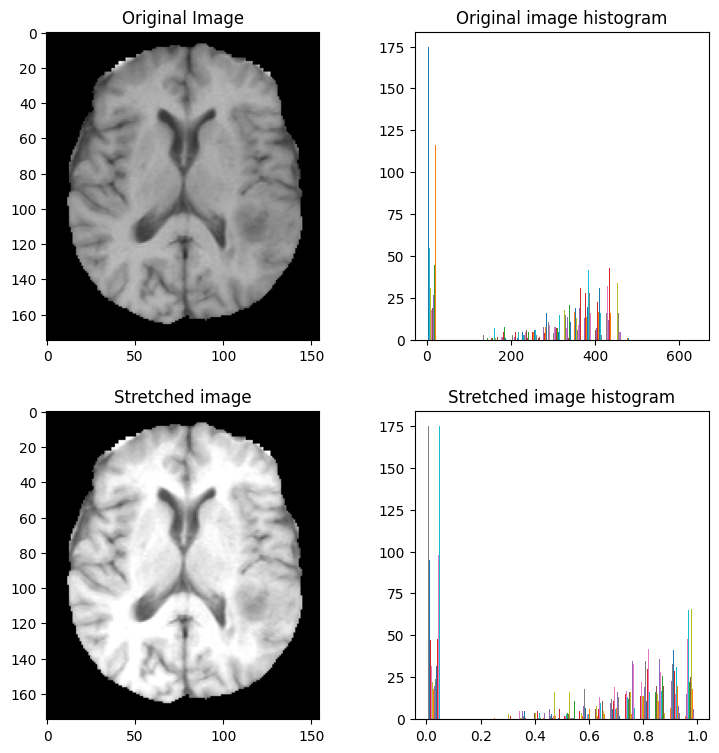

In [22]:
import numpy as np
import SimpleITK as sitk
from matplotlib import pyplot as plt
from skimage.exposure import equalize_adapthist as CLAHE

img_path = "MRI_images/T1.mha"
image = sitk.ReadImage(img_path)
img_array = sitk.GetArrayFromImage(image)
print(f"\nImage shape: {img_array.shape}")


# linear histogram stretching function
def hist_linear_stretching(image):

    P5 = np.percentile(image, 5)
    P95 = np.percentile(image, 95)
    P100 = np.percentile(image, 100)
    print(f"\nP5: {P5}\nP95: {P95}\nP100: {P100}\n")

    clipped_img = np.clip(image, P5, P95)
    shape = clipped_img.shape
    stretched = np.zeros([shape[0], shape[1]]) # zeros array with the same shape as the image
    
    # stretching algorithm
    for row in range(shape[0]):
        for column in range(shape[1]):
            i = clipped_img[row][column]
            stretched[row][column] = (i - P5) / (P95 - P5) # jmax=1; jmin=0

    return stretched

linear_stretched = hist_linear_stretching(img_array)


# plotting images with corresponding histograms
figs, axs = plt.subplots(2, 2, figsize=(8, 8))
figs.tight_layout(pad=3.0)

axs[0][0].imshow(img_array, cmap='grey')
axs[0][0].set_title("Original Image")

axs[0][1].hist(img_array, bins='auto')
axs[0][1].set_title("Original image histogram")

axs[1][0].imshow(linear_stretched, cmap='grey')
axs[1][0].set_title("Stretched image")

axs[1][1].hist(linear_stretched, bins='auto')
axs[1][1].set_title("Stretched image histogram")

plt.show()


# 2. Image Denoising

Acquiring an image is always prone to artifacts that may corrupt or degrade its quality. Examples of them are noise, blurring, and distortion. Multiple image restoration filters have been proposed in medical imaging to reduce the effect of these artifacts. Image filters may be used either to improve the image quality before reviewing it or as a pre-processing step to improve the result of further image processing operations such as segmentation.

<img src="./images/denoising.png" alt="drawing" width="500"/>

## 2.1 Noise suppression.

Image noise can often be assumed to be a high-frequency signal. Therefore, many noise reduction approaches filter the high-frequency components while preserving the low-frequency ones; a typical example is the 2D-Gaussian filter.

Despite the wide use of low-pass filtering, this technique has the side effect of blurring the edges of the image. To avoid it, smoothing filters that preserve the edges, such as the non-linear median filter, have been proposed.

<img src="./images/noise_removal.png" alt="drawing" width="700"/>

## 2.2 Edge enhancement
The goal is to enhance the edge contrast of an image in an attempt to improve its apparent sharpness. The resultant edge-image can be added to the original image to enhance the visual quality or be employed as input in an image segmentation approach. 

<img src="./images/edge_enhancement.png" alt="drawing" width="700"/>

## Exercise 2.1

To illustrate image filtering, you will restore an image which has been distorted with "Salt and Pepper" noise.

1. Read the ground truth image 'T2.mha' and its noisy version 'SP.mha'.
2. Apply [Gaussian filtering](https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.gaussian_filter.html) to the noisy image with a standard deviation of 1.
3. Calculate the filtered and the remaining noise.
4. Calculate the root mean squared error ([RMSE](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html)) between the obtained filtered image and the ground truth.
5. Create an edge map of the obtained filtered image using the [prewitt function](https://scikit-image.org/docs/dev/api/skimage.filters.html#skimage.filters.prewitt).
6. Repeat steps 3 to 5 using:
  - A [median filter](https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.median_filter.html) with a kernel of size 3. 
  - A mean filter with a kernel of size 3 x 3. Use [```np.ones```](https://numpy.org/doc/stable/reference/generated/numpy.ones.html) to create your kernel, and [ndimage.convolve](https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.convolve.html#scipy.ndimage.convolve) to apply the kernel to the image.

**hint:** ```RMSE = sqrt(MSE)```

## Report
<font color=blue>
    
- Show a three-by-four plot that displays the following for each method: the resultant filtered image, the filtered noise, the noise that remained and the edge map of the filtered image.     
- Provide all three values for the RMSE between filtered image and the ground truth. Comment briefly on the results.
- What is the interpretation of the difference image with the ground truth and the difference image with the original input image?
- Which filter works best in terms of RMSE and why?
- Which filter preserves the edges the best?
</font>

<font color=blue> Your answer here </font>

In [ ]:
# your code here

## 2.3 Intensity non-uniformity correction

Non-uniform intensity correction is another common task in image denoising. Grayscale inhomogeneities appear in magnetic resonance (MR) images as systematic changes in the local statistical characteristics of tissues. Homomorphic Unsharp Masking (HUM) is applied as a post-processing tool to reduce these intensity effects.

HUM is conceptually straightforward; it can be easily implemented and is very fast. It relies on the assumption that if grayscale inhomogeneities are not present in the image, the mean or median in a local window should match the global mean or median of the overall image. This assumption is approximately true when the filter window is large enough to enclose a representative sample of tissues.

For a detailed implementation see the paper: [*''Optimized Homomorphic Unsharp Masking for MR Grayscale Inhomogeneity Correction'' by Benjamin H. Brinkmann, Armando Manduca and Richard A. Robb, IEEE, 1998*](https://ieeexplore.ieee.org/document/700729)

HUM requires the computation of:
- The global mean value $\mu$ of the corrupted image
- The local mean values $\mu_{i,j}$ for each pixel considering a neighbourhood
- The HUM corrected/ideal value of a pixel is:

$$f_{i,j} = g_{i,j} \cdot \frac{\mu}{\mu_{i,j}},$$ 

   where $g_{i,j}$ is the intensity value of the input image (corrupted/observed image).

## Exercise 2.2

Image 'Bias.mha' is a biased corrupted version of 'Flair.mha'. Implement the HUM algorithm in three different ways to compensate for the artifact:

1. Implement the algorithm straightforwardly using a moving window of $40 \times 40$ pixels to calculate the local mean. Because of the size of your local window, you will not be able to correct pixels close to the image borders.
2. Involve the pixels at the image borders by prior padding the image and, thus, enlarging the image. Pad the image with zeros using half of your window size. To pad the image, use [```np.pad```](https://numpy.org/doc/stable/reference/generated/numpy.pad.html)
3. In addition to the padding, leave out the pixels belonging to the background by using a global threshold of 10 over the complete image. In other words, do not include the pixels below the threshold in your calculation of the global mean value.

We expect that for each case, you create a function that has the following backbone:
- Calculates the global mean intensity.
- For points 2 and 3: Before creating the template, you will have to pad the bias image with zeros using the half size of your window.
- For point 3: Get the global mean intensity of the padded bias image by globally applying the threshold.
- Iterate over the bias image using the window you set, and apply the HUM equation: $f_{i,j} = g_{i,j} \cdot \frac{\mu}{\mu_{i,j}}$.
- For points 2 and 3: You will have to return to the original image size. 


After the bias field is removed, calculate the [normalized-root-mean-squared-error](https://scikit-image.org/docs/dev/api/skimage.metrics.html#skimage.metrics.normalized_root_mse) (NRMSE) and the [structural similarity index](https://scikit-image.org/docs/dev/api/skimage.metrics.html#skimage.metrics.structural_similarity)  (SSIM) to evaluate the performance of the denoising algorithms.


**Remarks:** 

- Read the non-bias brain image in '```uint8```' format
- Since you will be padding with zeros, use: $\frac{\mu}{\mu_{i,j} + \varepsilon}$, $\varepsilon = 1^{-6}$
- Make sure the resultant images are in '```uint8```' format

## Report:
<font color=blue>
    
- Plot a one-by-four figure showing the image with bias (Bias.mha) and the three corrected images obtained using the different implementations of the HUM algorithm.
- Provide the values for the NRMSE and SSIM between the three corrected images and the ground truth (Flair.mha).
- Which case had a better performance? Why?.
    
</font>

<font color=blue> Your answer here </font>

In [ ]:
# your code here